In [1]:
setwd('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.1. Variable Importance Plot/Input')
Output = ('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1003. Ozone Sterols Healthy Asthma/P1003.3. Analyses/P1003.3.4. ML Visualizations/P1003.3.4.1. Variable Importance Plot/Output')
cur_date = "032322"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

#reading in files
var_imp_inflamm = data.frame(read_excel("031022_Significant_predictors_inflamm_covariates.xlsx"))
var_imp_lung = data.frame(read_excel("031022_Significant_predictors_lung_covariates.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(var_imp_inflamm)
head(var_imp_lung)

,Feature,Passed_Filter,MeanDecreaseGini
,<chr>,<chr>,<dbl>
1,MPO,Yes,0.3473727
2,IL16,Yes,0.2393954
3,IP10,Yes,0.8386137
4,IL8,Yes,0.6418942
5,bEP_Chol,Yes,0.2451955
6,Eotaxin,Yes,0.1276909


,Feature,Passed_Filter,MeanDecreaseGini
,<chr>,<chr>,<dbl>
1,Chol,Yes,1.1647238
2,25OH_VitD,Yes,0.5657178
3,dHLan,Yes,0.6382048
4,IL15,Yes,0.7162409
5,IL8,Yes,0.1727281
6,bEP_Chol,Yes,0.3834127


In [3]:
#creating a col that specifies which the response variable before creating 1 df
var_imp_inflamm$Response = "Inflammatory"
var_imp_lung$Response = "Lung"

var_imp_df = full_join(var_imp_inflamm %>%
                           select(-Passed_Filter), 
                       var_imp_lung %>%
                          select(-Passed_Filter))

var_imp_df$Response = factor(var_imp_df$Response, levels = c("Inflammatory", "Lung"))
head(var_imp_df)

Joining, by = c("Feature", "MeanDecreaseGini", "Response")


,Feature,MeanDecreaseGini,Response
,<chr>,<dbl>,<fct>
1,MPO,0.3473727,Inflammatory
2,IL16,0.2393954,Inflammatory
3,IP10,0.8386137,Inflammatory
4,IL8,0.6418942,Inflammatory
5,bEP_Chol,0.2451955,Inflammatory
6,Eotaxin,0.1276909,Inflammatory


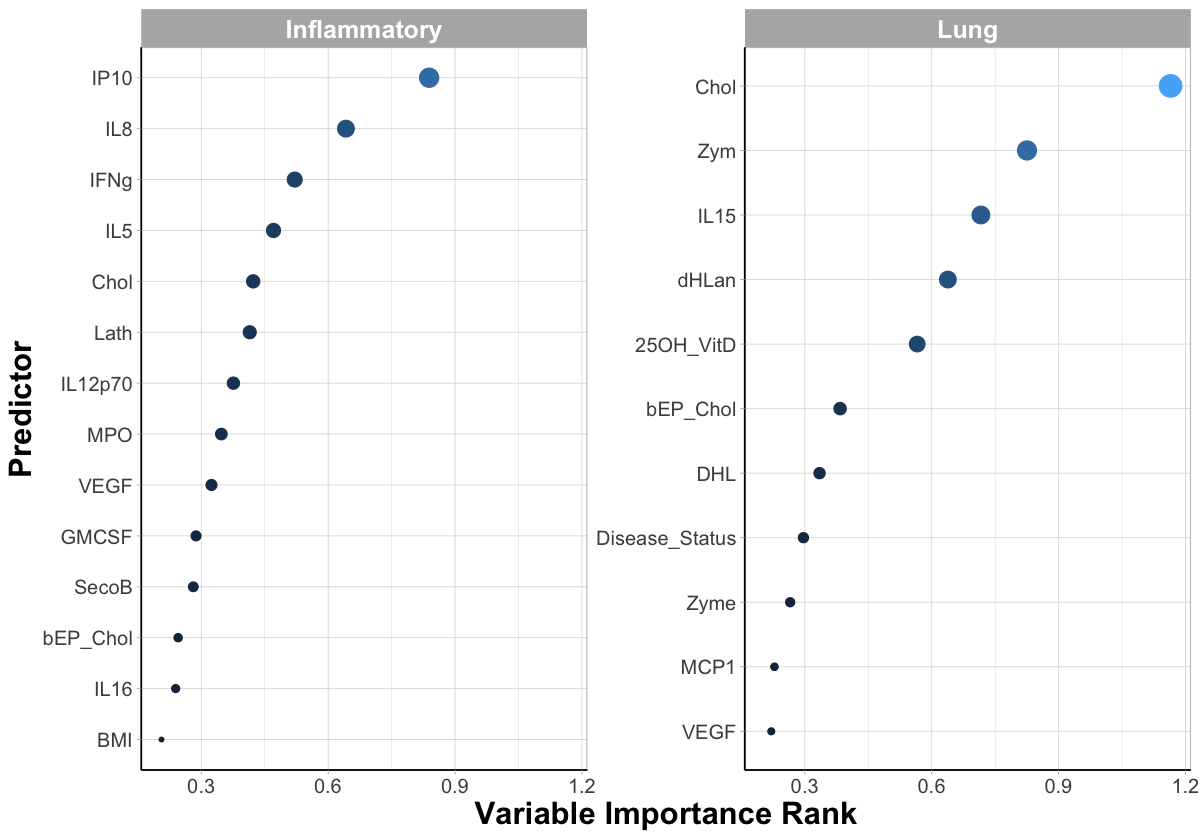

In [12]:
options(repr.plot.width=10, repr.plot.height=7) #changing size

#only plotting features w/ a mean decrease gini > 0.2
ggplot(data = var_imp_df %>% filter(MeanDecreaseGini > 0.2)) + 
  geom_point(aes(x = MeanDecreaseGini, y = reorder_within(Feature, MeanDecreaseGini, Response), 
                 color = MeanDecreaseGini, size = MeanDecreaseGini)) + 

  facet_wrap(~Response, scales = 'free_y') + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.position = "none", #removing legend
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Variable Importance Rank') + ylab('Predictor') + #changing axis labels 
  
  #this removes response variable from y axes
  scale_y_reordered() 